In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

Loading the dataset

In [2]:
tree = pd.read_csv('/content/heart.csv')

In [3]:
tree.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = tree.drop('target', axis=1)
Y = tree['target']

SPLITTING THE DATASET

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

TRAINING AND VISUALIZING DECISION TREE CLASSIFIER

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

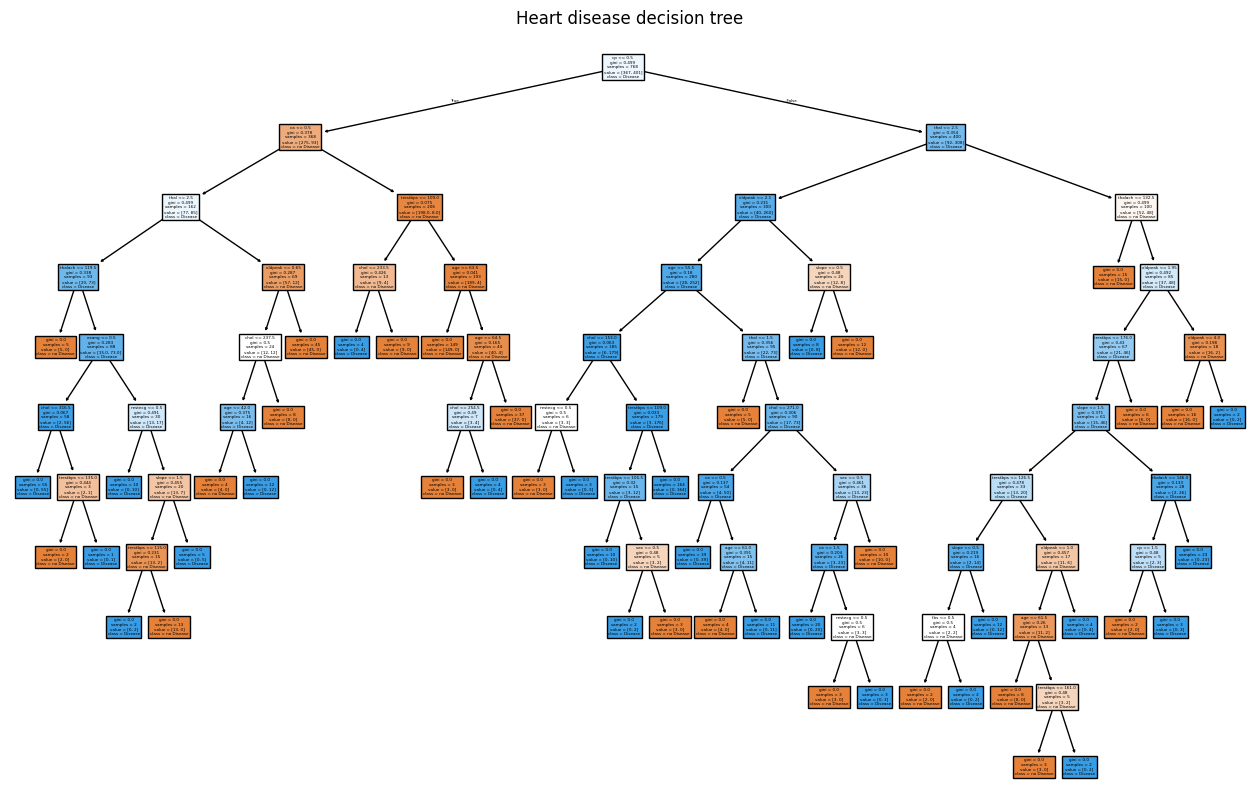

In [7]:
plt.figure(figsize=(16,10))
plot_tree(tree,feature_names=X.columns,class_names=["no Disease","Disease"],filled=True)
plt.title('Heart disease decision tree')
plt.show()

In [8]:
Y_pred_tree = tree.predict(X_test)
print("Decision_tree_accuracy",accuracy_score(Y_test,Y_pred_tree))

Decision_tree_accuracy 0.9766536964980544


ANALYZE OVER FIT

In [9]:
#likely overfit
deep_tree = DecisionTreeClassifier(max_depth=None,random_state=42)
deep_tree.fit(X_train,Y_train)
print("accuracy(No depth limit)",accuracy_score(Y_test,deep_tree.predict(X_test)))

#less overfitting
shallow_tree = DecisionTreeClassifier(max_depth=4,random_state=42)
shallow_tree.fit(X_train,Y_train)
print("accuracy(max depth limit)",accuracy_score(Y_test,shallow_tree.predict(X_test)))

accuracy(No depth limit) 0.9766536964980544
accuracy(max depth limit) 0.8171206225680934


RANDOM FOREST

In [10]:
forest = RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(X_train,Y_train)
Y_pred_forest = forest.predict(X_test)

print("Random forest accuracy",accuracy_score(Y_test,Y_pred_forest))

Random forest accuracy 1.0


FEATURE IMPORTANCE

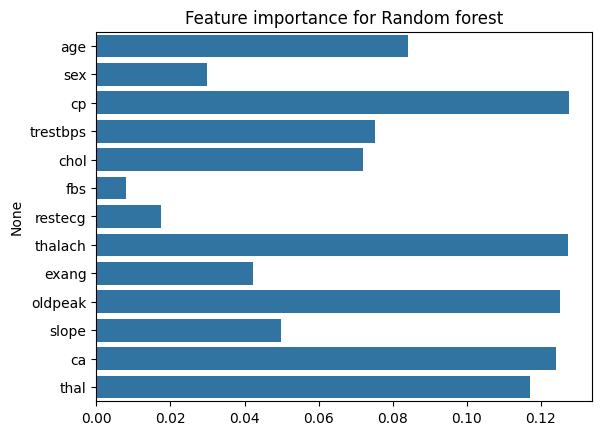

In [11]:
importance = forest.feature_importances_
features = X.columns

sns.barplot(x=importance,y=features)
plt.title('Feature importance for Random forest')
plt.show()

CROSS VALIDATION

In [12]:
#Cross Validation
scores = cross_val_score(forest, X, Y, cv=5)
print("Cross-validated Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


Cross-validated Accuracy: 1.00 ± 0.01
